<a href="https://colab.research.google.com/github/Zamoca42/TIL/blob/main/Stat/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from sklearn.datasets import load_boston # Scikit-Learn에서 제공하는 dataset package 호출
import pandas as pd                        # pandas package 호출 (DataFrame 활용)

In [2]:
boston_houseprice_data = load_boston()   # Boston지역의 주택가격 데이터를 활용하기 위해 데이터 로드

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
# 가져온 데이터와 변수명들을 활용하여 DataFrame 생성

df = pandas.DataFrame(
    data = boston_houseprice_data.data,
    columns = boston_houseprice_data.feature_names
)

In [4]:
# 초기 5건의 데이터를 출력해서 간단한 데이터 구조 확인
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# AGE 컬럼 불러오기
# 결과는 Series라는 1차원 구조로 출력됨
df['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [6]:
df.shape
# 데이터 개수 : 506개 (506개 행)
# 변수의 개수 : 13개 (13개 열)

(506, 13)

# 3. 변수의 분류 기준

- 질적 변수 / 양적 변수
  - 질적변수(Qualitative variable)
    - 변수의 값이 특정 범주에 포함되도록 표현가능한 변수 
      - 예) 아이들 장난감의 색상, 특정 집단 구성원의 성별, 종교 등
  - 양적변수(Quantitative variable) 
    - 변수의 값을 숫자로 나타낼 수 있는 변수 
      - 예) 사람의 키나 몸무게, 한 가정의 소득, 고속도로 통행량 등

- 이산 변수 / 연속 변수
  - 이산 변수(discrete variable)
    - 셀수 있는 변수 
      - 예) 아파트의층수,한회사의직원의수,불량품의개수등
  - 연속 변수(continuous variable)
    - 셀수 없는 변수
    - 이산 변수와 다르게 변수의 각 값 사이에 무수히 많은 또 다른 값들이 존재하는 특성을 띔
      - 예) 사람의 키, 몸무게, 나이, 한 가구의 소득 등

- 간격 변수 / 비율 변수 ( 연속형 변수 )
  - 간격변수 
    - 대소관계와 함께 그 차이에도 의미를 두는 변수 
      - 예) 연도, 온도등
  - 비율변수 
    - 대소관계, 차이, 비 모두에 의미를 두는 변수 
      - 예) 길이, 무게등

- 명목 변수 / 순위 변수
  - 명목변수 
    - 단순히 분류하기 위한 변수 
      - 예) 학생번호, 전화번호, 성별 등
  - 순위변수 
    - 순서관계 및 대소관계에 의미를 둔 변수 
      - 예) 성적 순위, 설문조사의 만족도 등

- 변수 분류의 중요성
  - 데이터 크기는 상대적으로 Pandas 활용시 쉽게 측정이 가능
  - 하지만, 변수의 분류는 변수의 성질을 파악하는 분석가로서의 지식이 필요
    

# 1차원 데이터 분석

- 데이터 분석
  - 평균 혹은 분산 등의 수치 지표에 따라 데이터를 요약
  - 그림을 그려 시각적으로 데이터를 살펴보는 방법
  - 활용할 Python Tool Package
    - Pandas: 데이터 관리에 용이 
    - Numpy: 수치 계산에 특화

- 수치 표현 규칙
  - 시각적으로 결과 파악을 수월하게 하기위해 소수점 3자리까지만, 유효숫자 표현을 제한



In [10]:
# Colab의 출력을 소수점 이하 3자리로 제한
%precision 3

# pandas DataFrame의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision', 3)

# 1. 대표값 ‒ 평균값, 중앙값, 최빈값

- 대표값이란?
  - 주어진 데이터를 대표하는 특정 값
  - 데이터를 하나의 값으로 요약한 지표
  - 예) 평균값, 중앙값, 최빈값 등
  - 즉,학창시절 어떤 시험의 난이도를 알고 싶다라고 할 때,
  전체 학생의 시험 점수를 알고 있지 못해도, 
  평균 점수가 높은지 낮은지 여부에 따라 시험의 난이도를 파악할 수 있다.

- 평균값 (Mean / Average)
  - 가장 잘 알려진 대표값 / 계산방법이 간단 
  - 일상생활에서도 가장 많이 쓰임
  - 계산방법
    - 데이터의 값을 모두 더한 뒤,데이터의 갯수로 나누어서 계산 
  - 계산예시

    ![스크린샷 2022-12-03 오후 11 53 56](https://user-images.githubusercontent.com/96982072/205447109-89ef0e9c-8d6e-44f8-beae-5f0842160c00.png)

    


- 평균값 (Mean / Average) 계산 방법

- 공식
  - $ \bar{X} = { \sum_{i=1}^n X_i \over n} $
  - $ X_i $ : i번째 개체의 측정값
  - $ \bar{X} $ : 집단의 평균

In [13]:
# 평균값 Pandas 계산

sum(df['AGE']) / len(df['AGE'])

68.57490118577076

In [ ]:
# 평균값 Pandas 계산2

df['AGE'].mean()

In [14]:
# 평균값 numpy 계산

import numpy as np

np.mean(df['AGE'])

68.57490118577076

- 중앙값 (Median)
   - 데이터를 크기 순서대로 나열하였을 때, 정확하게 중앙에 위치한 값 
   - 계산예시
    - [9,1,3,5,7]이라는 데이터가 있을 때,
데이터를 크기 순서대로 나열([9,1,3,5,7] -> [1,3,5,7,9]) 후 중간인 5가 중앙값이 됨

- 중앙값의 특징
  - 데이터의 이상값이 존재할 때, 평균값보다 대표값을 잘 표현해낸다.
즉, 이상값의 영향을 덜 받는다. 
  - 계산예시
    - [1,2,3,4,5,6,1000]이라는 데이터가 있을 때,  
      즉, 이상치 값이 존재할 때 평균값인 150이라는 수치는 
      1,2,3,4,5,6,1000 그 어떤 값도 비슷하게 표현하지 못한다.   
      평균값은 약 150이 나오지만, 중앙값은 4로서 표현되며, 이상치를 제외한 데이터들의 분포를 평균값 보다 더 잘 표현됨을 확인할 수 있다.

- 중앙값 (Median) 계산 방법
  - 데이터의 개수 n이 홀수라면, ${(n+1) \over 2}$ 번째 데이터가 중앙값

  - 데이터의 개수 n이 짝수라면, $ n \over 2 $ 번째 데이터와 $ {n \over 2} + 1 $ 번째 데이터의 평균이 중앙값

  - 계산예시
    - [1,2,3,4,5] -> 데이터 5개 -> 3번째인 3이 중앙값
    - [1,2,3,4,5,6] -> 데이터 6개 -> 3번째 데이터(3)와 4번째 데이터(4)의 평균인 ${3 + 4 \over 2} = 3.5$ 가 중앙값

In [15]:
# 중앙값 계산 방법

# len 계산
len(df['AGE']) # 506

# 253번째, 254번째 값
print(
    list(df['AGE'].sort_values())[int(len(df['AGE'])/2 -1)], 
    list(df['AGE'].sort_values())[int(len(df['AGE'])/2)]
)
# 중앙값 계산 : 253번째 값과 254번째 값의 평균값
print(
    (
        list(df['AGE'].sort_values())[int(len(df['AGE'])/2 -1)] +
        list(df['AGE'].sort_values())[int(len(df['AGE'])/2)]
    ) / 2
)

77.3 77.7
77.5


In [16]:
# 중앙값 pandas 계산 방법

df['AGE'].median()

77.5

In [17]:
# 중앙값 numpy 계산 방법

np.median(df['AGE'])

77.5

- 최빈값 (Mode)
  - 데이터에서 가장 많이 나타나는 값
  - 주로, 범주형 변수(질적 변수)의 대표값을 구할 때 사용됨
   (점수와 같은 수치형 변수는, 동일한 점수가 여러번 반복되는 경우가 거의 드물기 때문)
- 계산예시
  - [1,1,1,2,2,3]이라는 데이터 존재시, 1이 가장 많이 나타나므로
최빈값은 1이 된다.

In [18]:
# 최빈값 Pandas 계산 방법

df['AGE'].mode()

0    100.0
dtype: float64

In [19]:
# 최빈값 numpy 계산 방법

np.mode(df['AGE'])

# numpy는 계산불가

AttributeError: ignored

# 2. 산포도 ‒ 분산, 표준편차, 사분위

- 산포도
  - 대표값을 중심으로 자료들이 흩어져 있는 정도  
  (즉, 대표값이 같더라도 산포도에 따라 데이터는 다른 특성을   가진다.)
  - 하나의 수치로서 표현된다.
    - 수치가 작을수록 자료들이 대표값에 밀집
    - 수치가 클수록 자료들이 대표값을 중심으로 멀리 흩어져 있다
  - 산포도를 대표하는 값들 : 분산, 표준편차, 사분위

- 편차
  - 산포도를 구하는 첫걸음
  - 각 데이터가 평균으로부터 어느 정도 떨어져 있는지를 나타내는 지표 
  - 계산예시
    - A 학생의 점수이 42점, 10명의 평균 점수가 55점이라면, A 학생의 편차는 42-55로 -13점이 된다.

In [22]:
# 편차

# 데이터 a
score_a = [42, 69, 56, 41, 57, 48, 65, 49, 65, 58]
df_score_a = pd.DataFrame(score_a)
print(df_score_a)

# a의 편차
print(df_score_a - df_score_a.mean())

    0
0  42
1  69
2  56
3  41
4  57
5  48
6  65
7  49
8  65
9  58
      0
0 -13.0
1  14.0
2   1.0
3 -14.0
4   2.0
5  -7.0
6  10.0
7  -6.0
8  10.0
9   3.0


In [23]:
# 데이터 b

score_b = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
df_score_b = pd.DataFrame(score_b)
print(df_score_b)

# b의 편차
print(df_score_b - df_score_b.mean())

    0
0  50
1  60
2  58
3  54
4  51
5  56
6  57
7  53
8  52
9  59
     0
0 -5.0
1  5.0
2  3.0
3 -1.0
4 -4.0
5  1.0
6  2.0
7 -2.0
8 -3.0
9  4.0


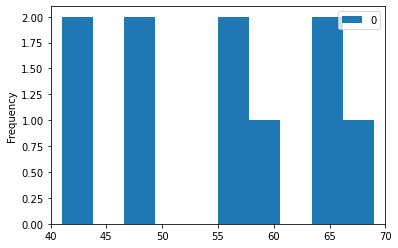

In [24]:
# 기초 데이터 a의 분포
df_score_a.plot.hist(xlim=[40,70])

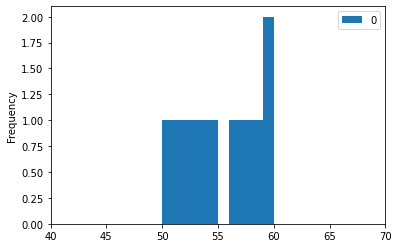

In [25]:
# 기초 데이터 b의 분포
df_score_b.plot.hist(xlim=[40,70])

- 편차의 값의 평균을 구해보면?
  - 편차 값들의 평균은 0

    ![스크린샷 2022-12-04 오후 11 24 33](https://user-images.githubusercontent.com/96982072/205496279-cae7b3ec-8c1b-4e30-8085-3caf357c1d7d.png)


- 즉, 편차 평균으로는 산포도를 계산할 수 없다!
  - 분산을 활용해보자.

- 분산
  - 편차의 제곱을 합산하여 평균을 계산한 값
    - 편차의 절대값을 합산하여 평균을 계산하는 방법도 있으나, 거의 활용되지 않는다.
  - 편차의 평균은 항상 0이 되는 문제를 고려하였다.

    ![스크린샷 2022-12-04 오후 11 29 10](https://user-images.githubusercontent.com/96982072/205496478-7c22a83e-d631-4b56-87a5-233702ae1d39.png)

In [28]:
# 분산 계산 방법

# Pandas - var()

print(df_score_a.var())

print(df_score_b.var())

# numpy - np.var()

print(np.var(df_score_a))

print(np.var(df_score_b))

0    95.556
dtype: float64
0    12.222
dtype: float64
0    86.0
dtype: float64
0    11.0
dtype: float64


- 분산 계산 방법
  - Pandas ( a: 95.556, b: 12.222, a’: 86, b’:11 )
    * Pandas에서 기본 var() 함수로 계산된 분산 값은 Numpy에서. 계산된 분산 값과는 값이 다르다. Pandas의 Var() 함수 결과값은. 표본분산이 아닌 불편분산이며, 앞에서 알려준 기존 분산의. 개념과는 다른 어려운 개념으로 추후 Ch.10에서 다룰 예정이다.
    * 동일하게 계산된 결과값을 얻고 싶을 때는, default 값으로 존재하던 ddof=1이 아닌 ddof=0를 직접 입력하면 동일한 결과를 확인할 수 있다.
  - Numpy(a:86,b:11)
    * 기본 표본분산의 개념으로 결과값을 얻을 수 있다.
  
- 표준편차
  - 평균의 단위는 원래의 데이터 단위와 다르지 않지만,  
  분산의 단위는 점수의 제곱으로 표현된다는 점에서 이해하기 어려운 단위이다. ( $86점^2$ ?! )
  - 따라서, 분산에 제곱근을 취하여, 원래의 데이터와 동일한 단위를 쓰도록 만들어진 산포도의 지표를
표준편차라고 한다.  
  ![스크린샷 2022-12-04 오후 11 33 59](https://user-images.githubusercontent.com/96982072/205496710-f18c297b-b3b6-45ac-8f62-0f610d1424e9.png)

- 표준편차 계산 방법

  - Pandas
    * std()함수에 ddof=0을 넣어서 확인 가능
  
  - Numpy
    * sqrt() 제곱근 함수를 분산값에 적용하는 방법
    * std() 함수를 그대로 활용하는 방법

In [31]:
# 표준편차 계산 방법

# pandas

print(df_score_a.std(ddof=0))
print('-'*30)
print(df_score_b.std(ddof=0))
print('-'*30)

# numpy

print(np.sqrt(np.var(df_score_a)))
print('-'*30)
print(np.sqrt(np.var(df_score_b)))

0    9.274
dtype: float64
------------------------------
0    3.317
dtype: float64
------------------------------
0    9.274
dtype: float64
------------------------------
0    3.317
dtype: float64


- 범위와 사분위 범위
  - 범위 (Range)
    - 데이터의 최대값과 최소값만으로 산포도를 표현하는 방법 
    - 분산 혹은 표준편차와는 달리,데이터 전체를 담은 표현 방식이 아니다
    - 즉, 최대값-최소값의 차이가 크면 산포도가 크고, 차이가 작으면 산포도가 작다는 것으로 표현된다. 
    - 값을 2개만 활용하기에, 개략적인 지표이며, 이상값을 반영하는 데 있어서 수준이 낮은 지표이다.

In [32]:
# 범위의계산방법

# pandas

print(df_score_a.max() - df_score_a.min())

print('-'*30)

# numpy

print(np.max(df_score_a) - np.min(df_score_a))

0    28
dtype: int64
------------------------------
0    28
dtype: int64


- 범위와 사분위 범위
  - 사분위 범위 (interquartile range)
    - 데이터의 하위 25%(Q1:제1사분위수), 50%(Q2:제2사분위수), 75%(Q3:제3사분위수)에 위치하는 값으로 표현된 범위
    - Q3‒Q1을 사분위 범위 IQR로 정의한다. 
  - 사분위 범위의 특징
    - 범위라는 값은 최대값 최소값만을 활용하고 있어서 이상값을 반영한 산포도를 표현하는 것이 어렵지만, 사분위 범위는 이상값을 반영한 산포도를 표현하는 것에 더욱 효과적이다.
    - 분산과 표준편차는 평균값에 대해 정의되는 산포도 지표인 반면, 사분위 범위는 중앙값에 대해 정의되는 산포도 지표이다.  
  (* IQR 계산시, Q2를 사용하지는 않지만 Q2의 개념은 중앙값과 일치)